In [2]:
from pymongo import MongoClient
import pandas as pd

# Connect to MongoDB
client = MongoClient('mongodb://localhost:27017/')
db = client['ev_data']
collection = db['ev']

# Convert to DataFrame
data = pd.DataFrame(list(collection.find()))

# Optional: Simplify DataFrame by selecting only needed columns
data = data[['Model Year', 'Electric Vehicle Type', 'City']]


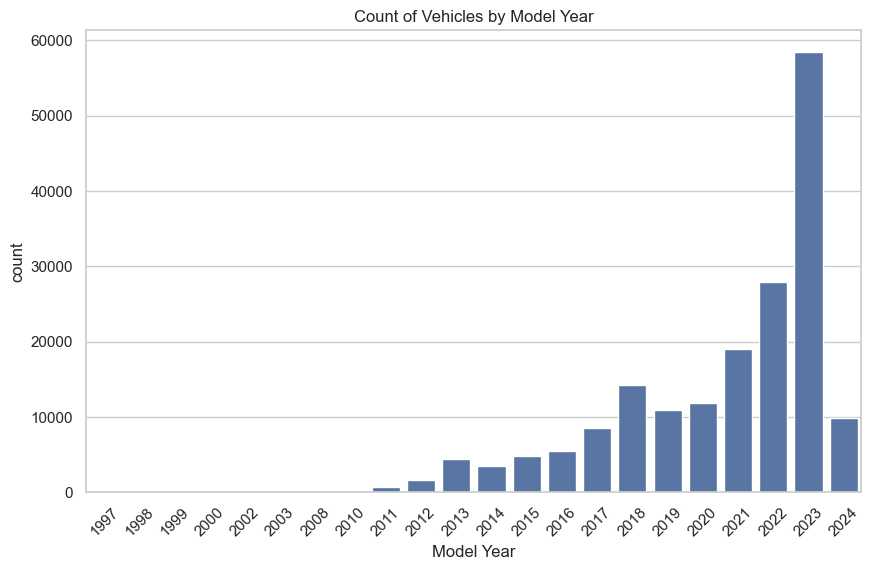

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Bar Chart: Number of Vehicles by Model Year
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Model Year')
plt.title('Count of Vehicles by Model Year')
plt.xticks(rotation=45)
plt.show()

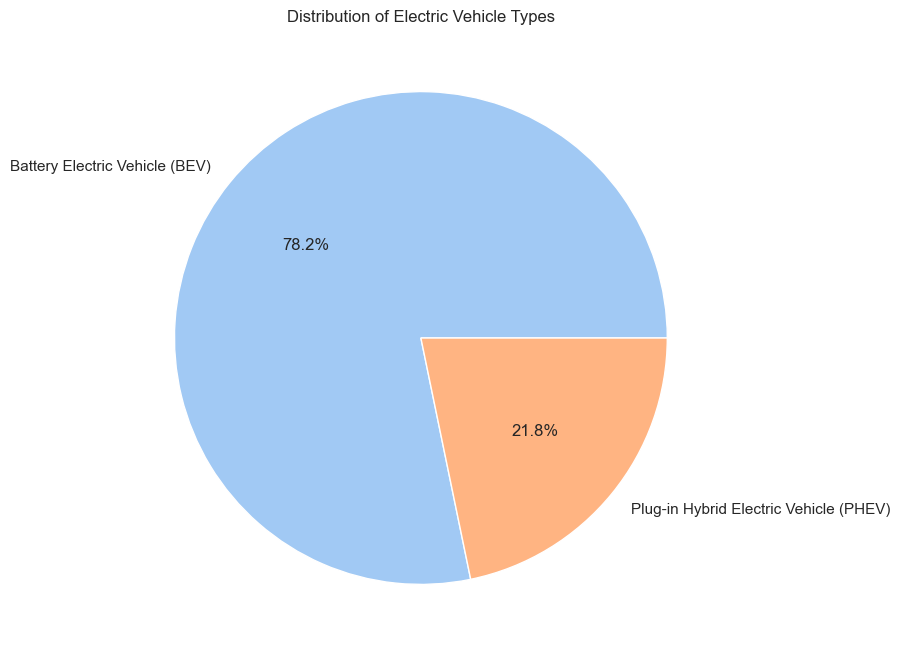

In [5]:
# Pie Chart for Distribution of Electric Vehicle Types
plt.figure(figsize=(8, 8))
data['Electric Vehicle Type'].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Distribution of Electric Vehicle Types')
plt.ylabel('')  # Hide the 'Electric Vehicle Type' label on the Y-axis
plt.show()

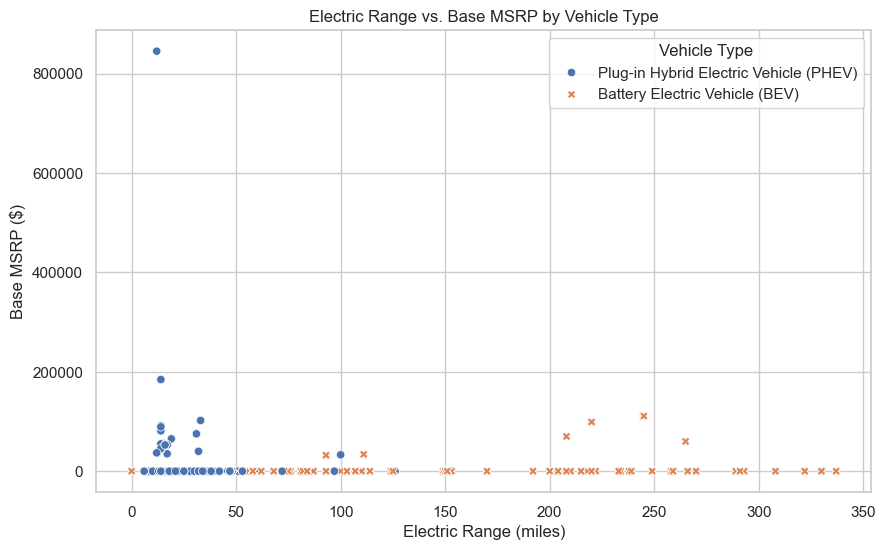

In [9]:
# Scatter Plot for Electric Range vs. Base MSRP
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Electric Range', y='Base MSRP', hue='Electric Vehicle Type', style='Electric Vehicle Type', palette='deep')
plt.title('Electric Range vs. Base MSRP by Vehicle Type')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Base MSRP ($)')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()
